In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

concatenating dataframe will help to find out if any special feature engineering needed for 
train set or test set which is not required for other like a NaN/Null that exist in one 
dataframe but not in other

In [ ]:
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df_test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Data Dictionary
--------------------------
survival  :	Survival -	0 = No, 1 = Yes
pclass    :	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd
sex       :	Sex 	
Age       :	Age in years 	
sibsp     :	# of siblings / spouses aboard the Titanic 	
parch     :	# of parents / children aboard the Titanic 	
ticket    :	Ticket number 	
fare      :	Passenger fare 	
cabin     : Cabin number 	
embarked  : Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
--------------------------
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
#categorical-Survived,Sex & Embarked 
#Ordinal-Pclass
#continous-Age,Fare
#discrete-SibSp,Parch
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_train.describe(percentiles=[0.75,0.8]) # Parch distribution from problem definition

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.describe(percentiles=[0.1,0.3,0.5,0.7,0.9,0.99]) # Age & Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
70%,624.000000,1.000000,3.000000,36.000000,1.000000,0.000000,27.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220


In [ ]:
#find out number of classes for categorical variables
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Null Values in df_train 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


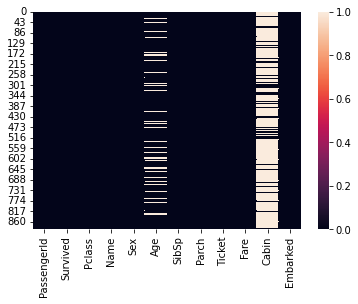

In [ ]:
print(f"Null Values in df_train \n\n{df_train.isnull().sum()}")
# using visualization for Missing value
sns.heatmap(df_train.isnull())

Null Values in df_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


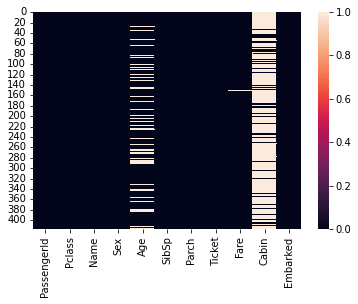

In [ ]:
print(f"Null Values in df_test\n\n{df_test.isnull().sum()}")
# using visualization for Missing value
sns.heatmap(df_test.isnull())

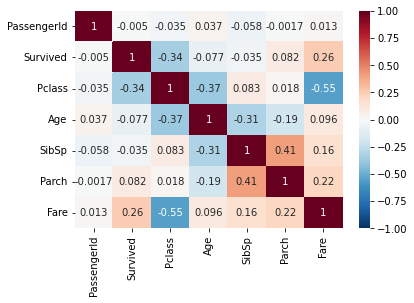

In [ ]:
# plotting correlation
corr=df_train.corr()
sns.heatmap(data=corr,cmap="RdBu_r",annot=True,vmin=-1,vmax=1)

we see few correlation between Fare,SibSp,Parch, Pclass  with Survived 
we start processing them one by one using pivoting feature

In [ ]:
# # Pclass & Survived
# df_train[['Pclass', 'Survived']].groupby(['Pclass'],
#         as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
# Sex & Servived (given in problem definition)
df_train[["Sex", "Survived"]].groupby(['Sex'],
        as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#SibSp & Survived
df_train[["SibSp", "Survived"]].groupby(['SibSp'], 
        as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#Parch & Survived
df_train[["Parch", "Survived"]].groupby(['Parch'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
#Fare & Survived --> well this one was stupid assumption (248 rows) :>
#df_train[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

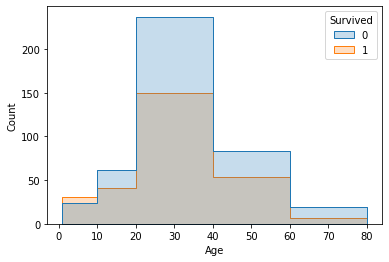

In [ ]:
# Now we plot Age vs Survived 
bins=[1,10,20,40,60,80]
#x=pd.cut(df["Age"],bins)
sns.histplot(data=df_train,x="Age",hue="Survived",element="step",bins=bins)

Age=1=10, number of survivors > number of casuality<br>
Age=20-40, highest number of survivors < highest number of casuality<br>
Age=40-60, second highest survivors < second highest casuality<br>
Age=60-80, less than 40 people boarded the ship , but most of them died

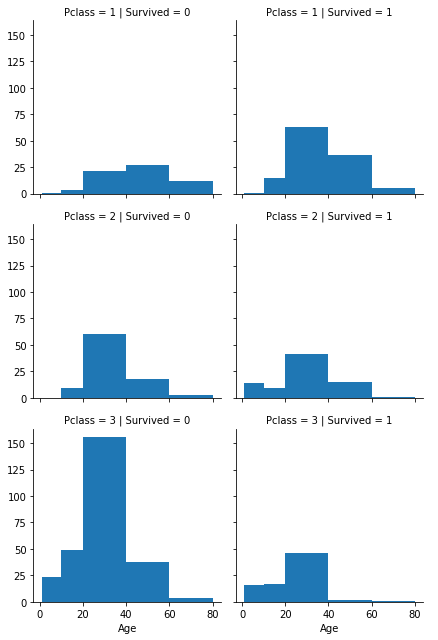

In [ ]:
#Pclass vs Survived
#sns.catplot(data=df,x="Pclass",y="Survived",kind="bar")
f=sns.FacetGrid(df_train,col='Survived',row='Pclass')
f.map(plt.hist,"Age",bins=bins)
f.add_legend()

Pclass=1 has highest survivor rate , followed by Pclass=2 & then 3 <br>
Casuality is maximum in Pclass=3 & minimum in Pclass=1


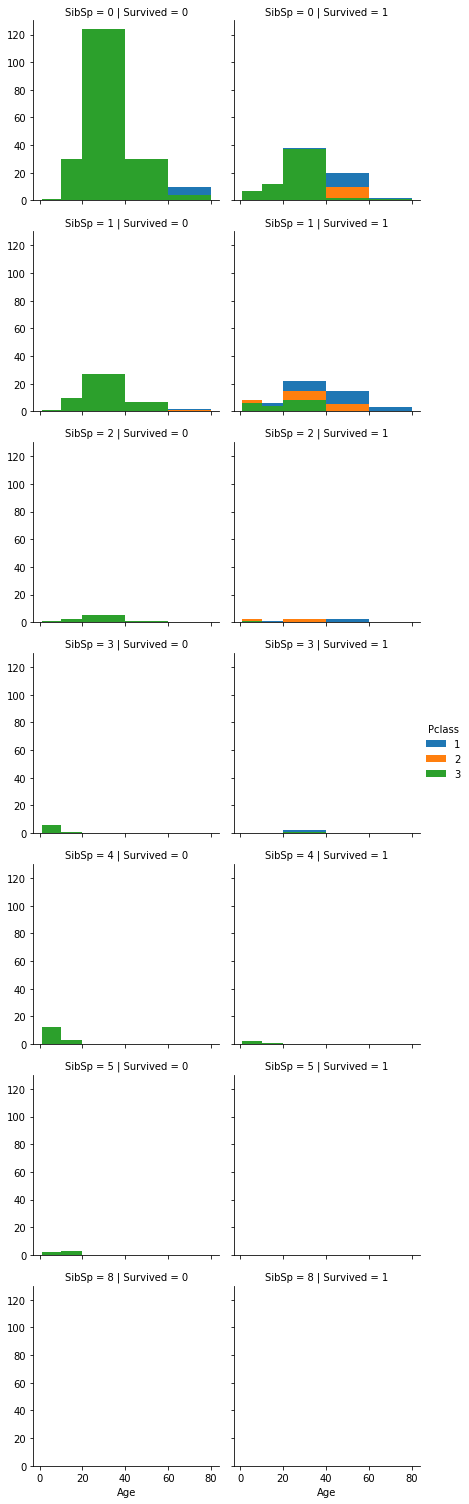

In [ ]:
# we need to take care of NaN for categorical values then we can get better result
f=sns.FacetGrid(df_train,col='Survived',row='SibSp',hue="Pclass")
f.map(plt.hist,"Age",bins=bins)
f.add_legend()

SibSp=0,Pclass=3 has most survivor & casuality rate<br>
SibSp=1,all 3 has second most survival rate but for Pclass=3 casuality rate is high<br>
SibSp>=2,very few from Pclass=1 & 3 has survived & the casuality rate for 
this is also not very high<br>
Below Parch(# of parent/child aboard titani) vs Survived plot confirms our analysis

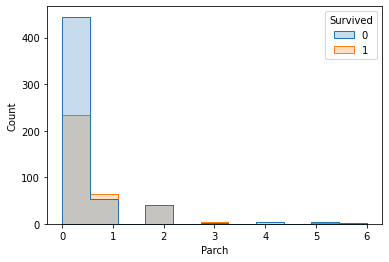

In [ ]:
# for Parch 0-1 & 2 we have records 
sns.histplot(data=df_train,x="Parch",hue="Survived",element="step")

Now looking at few interesting categorical feature as combined entity , my goal is to
look for any survival bias/relation exist or not toward upper class (Pclass=1),higher Fare,port of Embarkment and most obvious one (Sex) 

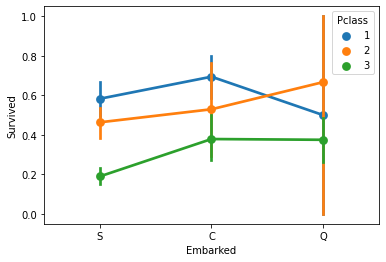

In [ ]:
#sns.relplot(data=df_train,x="Embarked",y="Survived",hue="Pclass",col="Sex")
sns.pointplot(data=df_train,x="Embarked",y="Survived",hue="Pclass")
#This plot failed to catch Sex feature

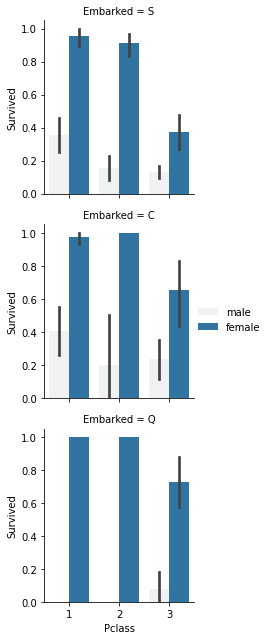

In [ ]:
# above plot has too much overlap & Sex feature was missing
f=sns.FacetGrid(df_train,row='Embarked')
f.map(sns.barplot,"Pclass","Survived","Sex",hue_order=["male","female"]) #(x,y,hue)
f.add_legend()

Embarked=S has higher survival rate for female<br>
Embarked=C has higher survival rate for male<br>
Embarked=Q has higher survival rate for female<br>

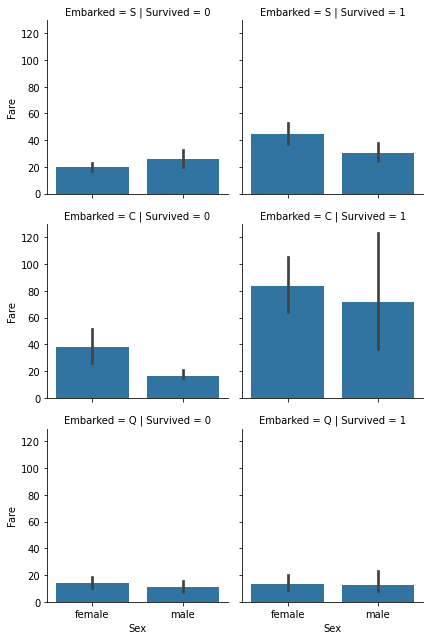

In [ ]:
# categorical & numerical
f=sns.FacetGrid(df_train,row="Embarked",col="Survived")
f.map(sns.barplot,"Sex","Fare") # one has to be numeric , we can't put both categorical
f.add_legend()

Embarked=S, fare <= 40 , survival of male & femal almost same , second highest<br>
Embarked=C, fare>=80, survival almost same ,highest<br>
Embarked=Q, fare<20, survival rate is minimum<br>
People paid higher fare for Embarked=C & lowest fare for Emabarked=Q

In [ ]:
df_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
df_train["PassengerId"].nunique()

891

In [ ]:
# drop few features (lots of unique value)
df_train=df_train.drop(['Ticket','PassengerId'],axis=1) 
df_test=df_test.drop(['Ticket','PassengerId'],axis=1)

In [ ]:
#df_train.value_counts(df_train['Cabin'].values,sort=True)
data = [df_train,df_test]
for dataset in data:
    print(pd.Series(dataset['Cabin'].unique()).sort_values())

101                A10
84                 A14
98                 A16
51                 A19
104                A20
108                A23
144                A24
110                A26
37                 A31
34                 A32
76                 A34
137                A36
18                  A5
7                   A6
31                  A7
125               B101
138               B102
63                 B18
30                 B19
118                B20
95                 B22
13                 B28
133                 B3
11                 B30
70                 B35
85                 B37
93                 B38
94                 B39
35                  B4
103                B41
146                B42
52                 B49
117                 B5
109                B50
115        B51 B53 B55
59     B57 B59 B63 B66
22             B58 B60
139                B69
114                B71
91                 B73
44                 B77
9                  B78
88                 B79
36         

Here We see Cabin feature has a pattern --> Alphabet(Cabin)+Number(Deck Number)<br>
27    C23 C25 C27<br>
23             A6<br>
So we can convert Alphabet to a categotical value as {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

In [ ]:
import re

In [ ]:

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train,df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature


In [ ]:
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,8


In [ ]:
# Processing Name feature
data = [df_train,df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    


In [ ]:
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(["Name"], axis=1)

In [ ]:
#change Sex to categorical
genders = {"male": 0, "female": 1}
data = [df_train,df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
# Lest's combine SibSp & Parch to get how may relative a person have

data = [df_train,df_test]

for dataset in data:
    dataset["Relatives"] = dataset["SibSp"] + dataset["Parch"]
    dataset.loc[dataset["Relatives"] > 0, "Alone"] = 0 # has atleast 1 relative
    dataset.loc[dataset["Relatives"] == 0, "Alone"] = 1 # no relative , alone
    dataset["Alone"] = dataset["Alone"].astype(int)
    
df_train["Alone"].value_counts()

1    537
0    354
Name: Alone, dtype: int64

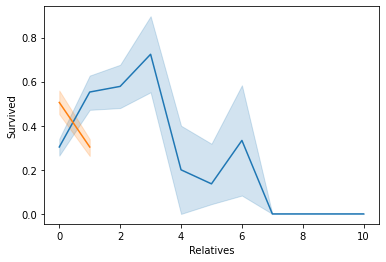

In [ ]:
sns.lineplot(x="Relatives",y="Survived",data=df_train)
sns.lineplot(x="Alone",y="Survived",data=df_train)

In [ ]:
# Now let's make Age continuous 

data = [df_train,df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_train["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_ = dataset["Age"].copy()
    age_[np.isnan(age_)] = rand_age # replace NaN with calculated random value
    dataset["Age"] = age_
    dataset["Age"] = df_train["Age"].astype(int)

df_train["Age"].isnull().sum()

0

Text(0, 0.5, 'Age')

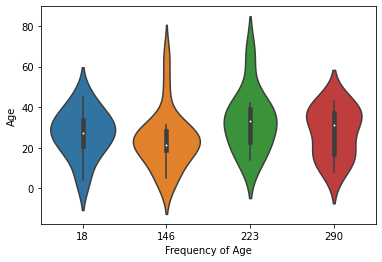

In [ ]:
fig=sns.violinplot(y=df_train["Age"],
               x=pd.cut(df_train["Age"],[20,30,40,60,70]).value_counts(),data=df_train)

fig.set_xlabel("Frequency of Age")
fig.set_ylabel("Age")

In [ ]:
# This Age Group will tell correlation between Survived & Age
df_train["AgeFreq"] = pd.cut(df_train["Age"],bins=[10,20,30,40,60,70,80])
df_train[["AgeFreq","Survived"]].groupby(["AgeFreq"], 
            as_index=False).mean().sort_values(by="AgeFreq", ascending=True)

,AgeFreq,Survived
0,"(10, 20]",0.356164
1,"(20, 30]",0.365517
2,"(30, 40]",0.390135
3,"(40, 60]",0.369863
4,"(60, 70]",0.222222
5,"(70, 80]",0.250000


In [ ]:
df_train = df_train.drop(["AgeFreq"], axis=1)

In [ ]:
# Now divide the data in groups , don't use pd.cut() it'll mess with outliers
#resulting in few NaN values or it's some other reason

data = [df_train,df_test]

for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)
    dataset.loc[ dataset["Age"] <= 10, "Age"] = 0
    dataset.loc[(dataset["Age"] > 10) & (dataset["Age"] <= 20), "Age"] = 1
    dataset.loc[(dataset["Age"] > 20) & (dataset["Age"] <= 30), "Age"] = 2
    dataset.loc[(dataset["Age"] > 30) & (dataset["Age"] <= 40), "Age"] = 3
    dataset.loc[(dataset["Age"] > 40) & (dataset["Age"] <= 50), "Age"] = 4
    dataset.loc[(dataset["Age"] > 50) & (dataset["Age"] <= 70), "Age"] = 5
    dataset.loc[(dataset["Age"] > 70) & (dataset["Age"] <= 80), "Age"] = 6
    dataset.loc[ dataset["Age"] > 80, "Age"] = 6         # this was creating problem

df_train["Age"].value_counts()

2    290
3    223
1    146
4    104
0     64
5     60
6      4
Name: Age, dtype: int64

In [ ]:
data = [df_train, df_test]

for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].dropna().median())
    dataset["Fare"] = dataset["Fare"].astype(int)


In [ ]:
df_train["FareFreq"] = pd.qcut(df_train["Fare"], 7)
df_train[["FareFreq","Survived"]].groupby(["FareFreq"], 
            as_index=False).mean().sort_values(by="FareFreq", ascending=True)

,FareFreq,Survived
0,"(-0.001, 7.0]",0.215768
1,"(7.0, 8.0]",0.142857
2,"(8.0, 12.0]",0.373333
3,"(12.0, 19.0]",0.410853
4,"(19.0, 27.0]",0.443548
5,"(27.0, 56.0]",0.456000
6,"(56.0, 512.0]",0.685039


In [ ]:
df_train=df_train.drop(["FareFreq"],axis=1)

In [ ]:
# Now let's devide Fare into groups
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset["Fare"] <= 7, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7) & (dataset["Fare"] <= 19), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 19) & (dataset["Fare"] <= 27), "Fare"]   = 2
    dataset.loc[(dataset["Fare"] > 27) & (dataset["Fare"] <= 56), "Fare"]   = 3
    dataset.loc[(dataset["Fare"] > 56) & (dataset["Fare"] <= 250), "Fare"]   = 4
    dataset.loc[ dataset["Fare"] > 250, "Fare"] = 5
    dataset["Fare"] = dataset["Fare"].astype(int)

In [ ]:
# Let's do encoding for Embarked
common_value = "S"
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna(common_value)
    dataset["Embarked"] = dataset["Embarked"].map(ports)
        

In [ ]:
# Creating a new column by combining Age & Pclass to reduce outliersdata = [df_train, df_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
# Creating a new column by combining Fare & Relatives to reduce outliers
data = [df_train, df_test]
for dataset in data:
    dataset["Fare_Per_Head"] = dataset["Fare"]/(dataset["Relatives"]+1)
    dataset["Fare_Per_Head"] = dataset["Fare_Per_Head"].astype(int)
    

df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Relatives,Alone,Age_Class,Fare_Per_Head
0,0,3,0,2,1,0,0,0,8,1,1,0,6,0
1,1,1,1,3,1,0,4,1,3,3,1,0,3,2
2,1,3,1,2,0,0,0,0,8,2,0,1,6,0
3,1,1,1,3,1,0,3,0,3,3,1,0,3,1
4,0,3,0,3,0,0,1,0,8,1,0,1,9,1
5,0,3,0,4,0,0,1,2,8,1,0,1,12,1
6,0,1,0,5,0,0,3,0,5,1,0,1,5,3
7,0,3,0,0,3,1,2,0,8,4,4,0,0,0
8,1,3,1,2,0,2,1,0,8,3,2,0,6,0
9,1,2,1,1,1,0,3,1,8,3,1,0,2,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Survived       891 non-null    int64
 1   Pclass         891 non-null    int64
 2   Sex            891 non-null    int64
 3   Age            891 non-null    int64
 4   SibSp          891 non-null    int64
 5   Parch          891 non-null    int64
 6   Fare           891 non-null    int64
 7   Embarked       891 non-null    int64
 8   Deck           891 non-null    int64
 9   Title          891 non-null    int64
 10  Relatives      891 non-null    int64
 11  Alone          891 non-null    int64
 12  Age_Class      891 non-null    int64
 13  Fare_Per_Head  891 non-null    int64
dtypes: int64(14)
memory usage: 97.6 KB


In [ ]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.copy()

In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.82

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.44

In [ ]:
# calculate correlation coefficient
coeff_df = pd.DataFrame(df_train.columns.delete(0)) # drop survived 
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
1,Sex,2.183153
8,Title,0.480726
6,Embarked,0.235315
5,Fare,0.091547
12,Fare_Per_Head,0.070790
4,Parch,-0.013109
11,Age_Class,-0.033204
7,Deck,-0.097755
3,SibSp,-0.279416
2,Age,-0.284974


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.72

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


77.89

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.14

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.14

In [ ]:
models = pd.DataFrame({
    'Model': ["Support Vector Machines","Stochastic Gradient Descent","Logistic Regression","Gaussian Naive Bayes",
              "Decision Tree","Random Forest"],
    'Score': [acc_svc,acc_sgd,acc_log,acc_gaussian,acc_decision_tree,acc_random_forest]})
models.sort_values(by="Score", ascending=False)

,Model,Score
4,Decision Tree,92.14
5,Random Forest,92.14
0,Support Vector Machines,82.72
2,Logistic Regression,81.82
3,Gaussian Naive Bayes,77.89
1,Stochastic Gradient Descent,77.44


In [ ]:
# calculating metrics,hyperparameter tuning 
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.83146067 0.73033708 0.85393258 0.86516854 0.84269663
 0.83146067 0.80898876 0.84269663 0.86516854]
Mean: 0.826079900124844
Standard Deviation: 0.03909439651116987


In [ ]:
# Calcualting Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.201
Sex,0.184
Deck,0.093
Age_Class,0.088
Pclass,0.072
Fare,0.066
Relatives,0.064
Age,0.062
Embarked,0.054


In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=3)
scores = cross_val_score(dt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.75280899 0.73033708 0.84269663 0.82022472 0.80898876
 0.82022472 0.7752809  0.83146067 0.78651685]
Mean: 0.7912983770287141
Standard Deviation: 0.03730098288162081


In [ ]:
# Calcualting Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(decision_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.442
Relatives,0.127
Deck,0.090
Age_Class,0.070
Pclass,0.069
Embarked,0.043
Fare,0.040
Fare_Per_Head,0.036
SibSp,0.031


In [ ]:
# tree.plot_tree(decision_tree)
# plt.show()

In [ ]:
# Dropping unimportant feature
data=[df_train,df_test]
for dataset in data:
    dataset=dataset.drop(['Alone','Parch'],axis=1)


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.14 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.37 %


In [ ]:
# param_grid = { "criterion" : ["gini", "entropy"], 
#               "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
#               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
#               "n_estimators": [100, 400, 700, 1000, 1500]}


# rf = RandomForestClassifier(n_estimators=100, max_features='auto', 
#                             oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, Y_train)
# clf.bestparams

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.26 %


In [ ]:

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[495,  54],
       [ 99, 243]])

In [ ]:
print("Precision: ", precision_score(Y_train, predictions))
print("Recall: ",recall_score(Y_train, predictions))
print("F1-score: ",f1_score(Y_train, predictions))

Precision:  0.8181818181818182
Recall:  0.7105263157894737
F1-score:  0.7605633802816901


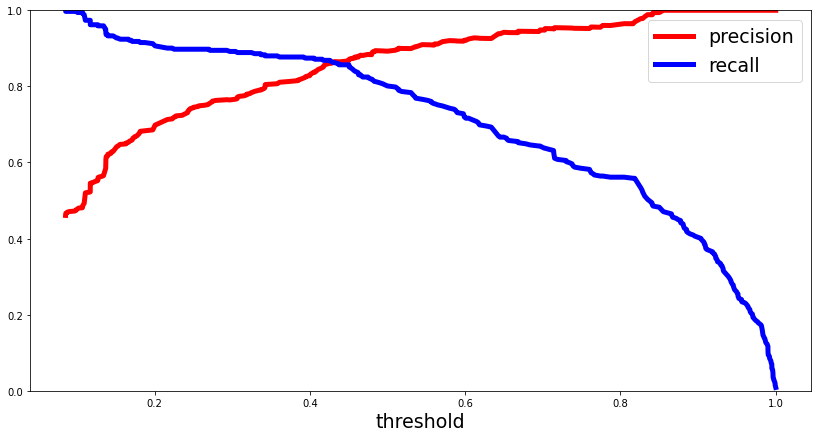

In [ ]:


# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

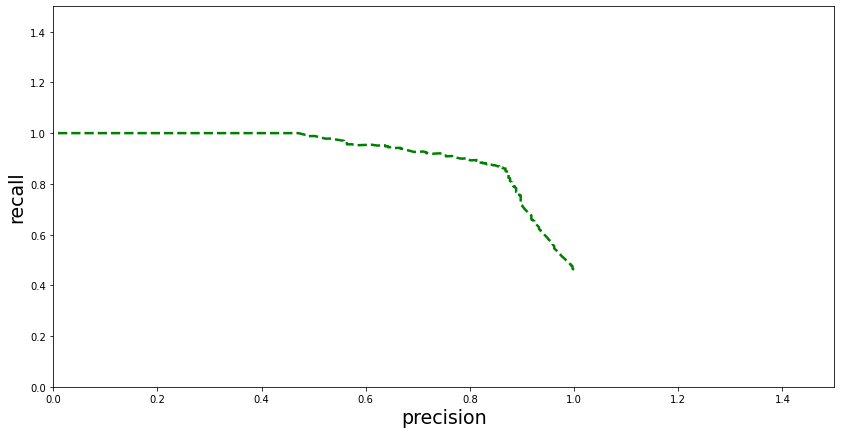

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

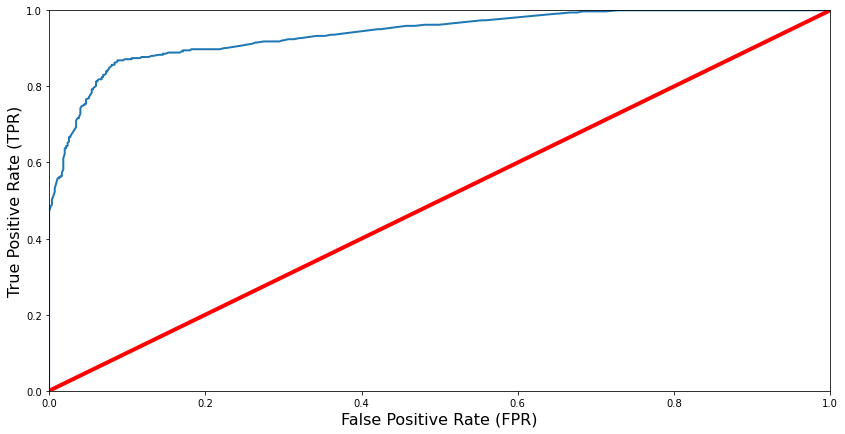

In [ ]:

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [ ]:

r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9383142129762779


In [ ]:
df_new_test=pd.read_csv('/content/test.csv')
submission = pd.DataFrame({
        "PassengerId": df_new_test["PassengerId"],
        "Survived": Y_prediction
    })


In [ ]:
#submission.to_csv('submission.csv', index=False)